In [1]:
# Cell 1: Import libraries for Task 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

print("✅ Task 3: Sentiment and Correlation Analysis Started!")

✅ Task 3: Sentiment and Correlation Analysis Started!


In [2]:
# Cell 2: Load both news and stock data
# Load news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
print("📰 News Data:", news_df.shape)

# Load stock data (we'll use the processed data from Task 2)
import glob
stock_files = glob.glob('../data/*.csv')
stock_files = [f for f in stock_files if 'raw_analyst_ratings' not in f]

stock_data = {}
for file in stock_files:
    stock_name = file.split('\\')[-1].replace('.csv', '')
    stock_data[stock_name] = pd.read_csv(file)
    stock_data[stock_name]['Date'] = pd.to_datetime(stock_data[stock_name]['Date'])
    
print("📈 Stock Data Loaded:")
for stock, df in stock_data.items():
    print(f" - {stock}: {df.shape}")

📰 News Data: (1407328, 6)
📈 Stock Data Loaded:
 - AAPL: (3774, 6)
 - AMZN: (3774, 6)
 - GOOG: (3774, 6)
 - META: (2923, 6)
 - MSFT: (3774, 6)
 - NVDA: (3774, 6)


In [3]:
# Cell 3: Sentiment Analysis Function
def get_sentiment(text):
    """Get sentiment polarity score using TextBlob"""
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0.0  # Neutral sentiment for errors

print("🔤 Performing sentiment analysis on headlines...")

# Sample first to test
sample_headlines = news_df['headline'].head(5)
for i, headline in enumerate(sample_headlines):
    sentiment = get_sentiment(headline)
    print(f"'{headline}' -> Sentiment: {sentiment:.3f}")

# Apply to all headlines (this might take a minute)
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)
print("✅ Sentiment analysis completed!")

🔤 Performing sentiment analysis on headlines...
'Stocks That Hit 52-Week Highs On Friday' -> Sentiment: 0.000
'Stocks That Hit 52-Week Highs On Wednesday' -> Sentiment: 0.000
'71 Biggest Movers From Friday' -> Sentiment: 0.000
'46 Stocks Moving In Friday's Mid-Day Session' -> Sentiment: 0.000
'B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88' -> Sentiment: 0.000
✅ Sentiment analysis completed!


📊 Sentiment Analysis Results:
Average sentiment: 0.049
Sentiment range: [-1.000, 1.000]

Sentiment Distribution:
sentiment_category
Neutral     1046537
Positive     269878
Negative      90913
Name: count, dtype: int64


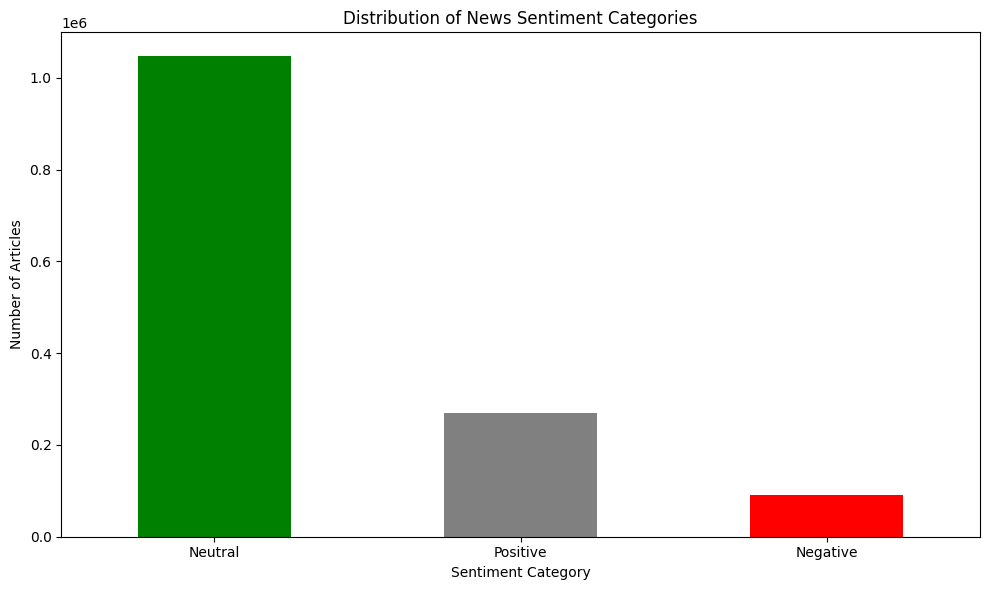

In [4]:
# Cell 4: Analyze sentiment distribution
print("📊 Sentiment Analysis Results:")
print(f"Average sentiment: {news_df['sentiment'].mean():.3f}")
print(f"Sentiment range: [{news_df['sentiment'].min():.3f}, {news_df['sentiment'].max():.3f}]")

# Categorize sentiments
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

news_df['sentiment_category'] = news_df['sentiment'].apply(categorize_sentiment)

print("\nSentiment Distribution:")
sentiment_counts = news_df['sentiment_category'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of News Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 5: Prepare dates for alignment
print("📅 Preparing dates for alignment...")

# Convert news dates (they're already datetime from Task 1)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['news_date'] = news_df['date'].dt.date  # Extract just the date part

print(f"News date range: {news_df['date'].min()} to {news_df['date'].max()}")
print(f"Unique news dates: {news_df['news_date'].nunique()}")

# Show sentiment by stock
print("\n📊 Average Sentiment by Stock Symbol (Top 15):")
sentiment_by_stock = news_df.groupby('stock')['sentiment'].mean().sort_values(ascending=False)
print(sentiment_by_stock.head(15))